# 2. Shot and Pass Maps

### FoT Shot Map

In [2]:
#Size of pitch in yards
pitchLength=120
pitchWidth=80

In [4]:
#ID for Denmark vs Australia
matchID = 7532
matchIDs = [7581, 7532, 7563, 7547]
comp_id = 43
season_id = 3
home_team = "Peru"
away_team = "Denmark"

In [5]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
event_url = base_url + "events/{}.json"

Function which load all event data from a whole competition.

In [143]:
'''
def load_data(comp_id, season_id):
    matches = requests.get(url=comp_url.format(comp_id,season_id)).json()
    
    match_ids = [match["match_id"] for match in matches 
                 if match["home_team"]["home_team_name"] == "Denmark" or match["away_team"]["away_team_name"]  == "Denmark"]

    all_events = []
    for match_id in match_ids:
        events = requests.get(url=event_url.format(match_id)).json()
        all_events.append(events)
    
    return all_events
'''

In [6]:
#Load event data of the reqiured match
match = requests.get(url=event_url.format(matchID)).json()

In [8]:
#Turn json format into pandas dataframe
df = json_normalize(match, sep="_").assign(match_id = requests.get(url=event_url.format(matchID)))

In [10]:
#Extract the shots from the match
shots = df.loc[df["type_name"] == "Shot"]

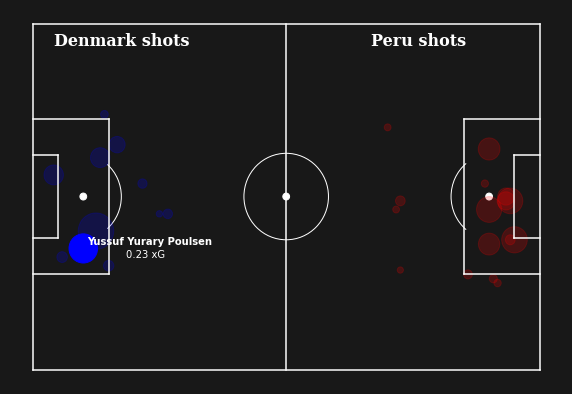

In [14]:
#Create Pitch
(fig, ax) = createPitch(pitchLength, pitchWidth, "yards", "white")
#plot the shots
for i,shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]

    goal = shot['shot_outcome_name'] == 'Goal'
    penalty = shot['shot_type_name'] == 'Penalty'
    team_name = shot['team_name']

    circleSize = np.sqrt(shot['shot_statsbomb_xg']*50)

    if (team_name == home_team):
        if penalty:
            continue
        elif goal:
            shotCircle = plt.Circle((x, pitchWidth-y), circleSize, color = "red")
            plt.text((x+1), pitchWidth-y+1, xg, color = "white", fontweight="bold")
            plt.text((x+1), pitchWidth-y+1, shot['shot_statsbomb_xg'], color = "white")
        else:
            shotCircle = plt.Circle((x, pitchWidth-y), circleSize, color = "red")     
            shotCircle.set_alpha(.2)
    elif (team_name == away_team):
        if penalty:
            continue
        elif goal:
            shotCircle=plt.Circle((pitchLength-x, y), circleSize, color="blue") 
            plt.text((pitchLength-x+1), y+1, shot['player_name'], color="white", fontweight="bold")
            plt.text((pitchLength-x+10), y-2, str(round(shot['shot_statsbomb_xg'], 2)) + " xG", color = "white")
        else:
            shotCircle = plt.Circle((pitchLength-x, y), circleSize, color = "blue")      
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
    

plt.text(5,75,away_team + ' shots', size=16, family="Serif", fontweight="800", color="white") 
plt.text(80,75,home_team + ' shots', size=16, family="Serif", fontweight="800", color="white")
fig.set_facecolor("#181818")

fig.set_size_inches(10, 7)
plt.show()

### FoT Pass Map

Extract all the passes from our dataset

In [15]:
passes = df.loc[df["type_name"] == "Pass"].set_index("id")

Create a Pass Map of Yussuf Poulsens passes vs Peru.

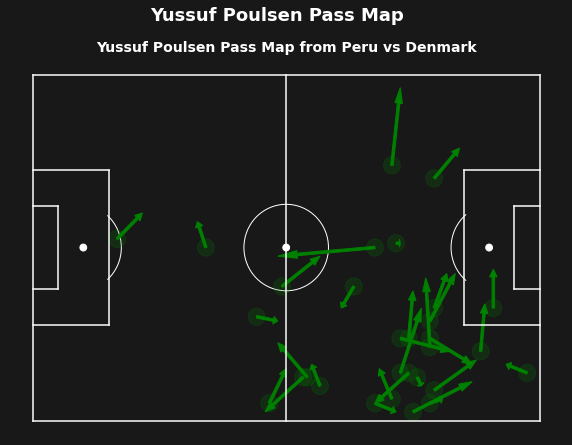

In [16]:
(fig, ax) = createPitch(pitchLength, pitchWidth, "yards", "white")
for i, thepass in passes.iterrows():
    if "Poulsen" in thepass["player_name"]:
        x = thepass["location"][0]
        y = thepass["location"][1]
        passCircle = plt.Circle((x,pitchWidth-y), 2, color="green")
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        dx = thepass["pass_end_location"][0]-x
        dy = thepass["pass_end_location"][1]-y
        passArrow = plt.Arrow(x, pitchWidth-y, dx, -dy, width = 3, color="green")
        ax.add_patch(passArrow)

plt.suptitle("Yussuf Poulsen Pass Map", color="white", fontsize=18, fontweight="bold")
plt.title("Yussuf Poulsen Pass Map from " + home_team + " vs " + away_team, color="white", fontsize=14, fontweight="bold")
fig.set_facecolor("#181818")
fig.set_size_inches(10, 7)
plt.show()

Create a Pass Map for Christian Eriksen vs Peru

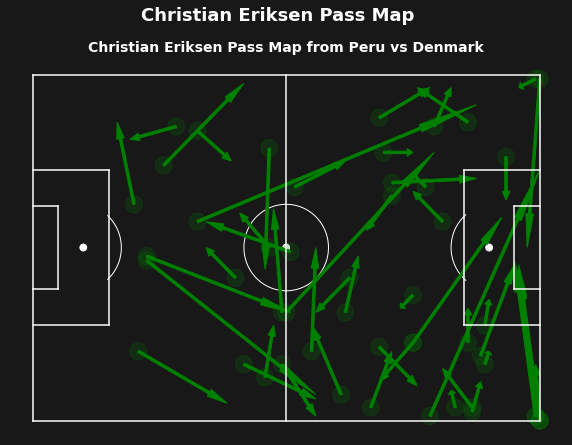

In [17]:
(fig, ax) = createPitch(pitchLength, pitchWidth, "yards", "white")
for i, thepass in passes.iterrows():
    if "Eriksen" in thepass["player_name"]:
        x = thepass["location"][0]
        y = thepass["location"][1]
        passCircle = plt.Circle((x,pitchWidth-y), 2, color="green")
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        dx = thepass["pass_end_location"][0]-x
        dy = thepass["pass_end_location"][1]-y
        passArrow = plt.Arrow(x, pitchWidth-y, dx, -dy, width = 3, color="green")
        ax.add_patch(passArrow)

plt.suptitle("Christian Eriksen Pass Map", color="white", fontsize=18, fontweight="bold")
plt.title("Christian Eriksen Pass Map from " + home_team + " vs " + away_team, color="white", fontsize=14, fontweight="bold")
fig.set_facecolor("#181818")
fig.set_size_inches(10, 7)
plt.show()